In [3]:
# Import required libraries
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
import markdown
from IPython.display import display, Markdown
import json
import time
import random
from fake_useragent import UserAgent
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

In [5]:
# Initialize user agent generator
ua = UserAgent()

**1. Web Search Agent**

In [ ]:
class WebSearchAgent:
    def __init__(self):
        self.job_platforms = {
            'LinkedIn': 'https://www.linkedin.com/jobs/search/?keywords={}&location=MENA',
            'Bayt': 'https://www.bayt.com/en/jobs/?filters[keywords]={}&filters[country_ids][0]=1856',
            'Wuzzuf': 'https://wuzzuf.net/search/jobs/?a=hpb%7Cspbg&q={}&filters[country][0]=Egypt',
            'Glassdoor': 'https://www.glassdoor.com/Job/mena-{}-jobs-SRCH_IL.0,4_IN228_KO5,7.htm'
        }
        self.headers = {
            'User-Agent': ua.random,
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
            'Referer': 'https://www.google.com/'
        }
        self.cache_dir = 'job_cache'
        os.makedirs(self.cache_dir, exist_ok=True)
        
    def search_jobs(self, keywords, max_pages=2):
        
        #Search for jobs across multiple platforms
        
        all_jobs = []
        
        for platform, url_template in self.job_platforms.items():
            print(f"Searching {platform} for '{keywords}'...")
            try:
                search_url = url_template.format(keywords.replace(' ', '%20'))
                jobs = self._scrape_platform(platform, search_url, max_pages)
                all_jobs.extend(jobs)
                print(f"Found {len(jobs)} jobs on {platform}")
                time.sleep(2)  # Be polite with delay between requests
            except Exception as e:
                print(f"Error searching {platform}: {str(e)}")
                continue
                
        return all_jobs
    
    def _scrape_platform(self, platform, url, max_pages):
        
        if platform == 'LinkedIn':
            return self._scrape_linkedin(url, max_pages)
        elif platform == 'Bayt':
            return self._scrape_bayt(url, max_pages)
        elif platform == 'Wuzzuf':
            return self._scrape_wuzzuf(url, max_pages)
        elif platform == 'Glassdoor':
            return self._scrape_glassdoor(url, max_pages)
        else:
            return []
    
    def _scrape_linkedin(self, url, max_pages):
        """Mock LinkedIn scraping - in practice would use API or careful scraping"""
        # In a real implementation, we would use proper scraping or API
        # This is a mock implementation with sample data
        jobs = []
        for i in range(5):
            jobs.append({
                'title': f"AI {'Engineer' if i%2 else 'Researcher'}",
                'company': f"Tech Company {i+1}",
                'location': random.choice(['Dubai', 'Riyadh', 'Cairo', 'Abu Dhabi']),
                'description': "Looking for AI professional with experience in ML, Python, and TensorFlow.",
                'platform': 'LinkedIn',
                'posted_date': (datetime.now() - pd.Timedelta(days=random.randint(0, 30))).strftime('%Y-%m-%d'),
                'url': f"https://linkedin.com/job/{i}"
            })
        return jobs
    
    def _scrape_bayt(self, url, max_pages):
        """Mock Bayt scraping"""
        jobs = []
        for i in range(4):
            jobs.append({
                'title': f"Machine Learning {'Developer' if i%3 else 'Scientist'}",
                'company': f"AI Solutions {i+1}",
                'location': random.choice(['Kuwait', 'Qatar', 'Saudi Arabia', 'Egypt']),
                'description': "Seeking ML expert with PyTorch, NLP, and computer vision skills.",
                'platform': 'Bayt',
                'posted_date': (datetime.now() - pd.Timedelta(days=random.randint(0, 30))).strftime('%Y-%m-%d'),
                'url': f"https://bayt.com/job/{i}"
            })
        return jobs
    
    def _scrape_wuzzuf(self, url, max_pages):
        """Mock Wuzzuf scraping"""
        jobs = []
        for i in range(3):
            jobs.append({
                'title': f"Data {'Scientist' if i%2 else 'Engineer'}",
                'company': f"Data Co {i+1}",
                'location': random.choice(['Egypt', 'Morocco', 'Tunisia', 'Jordan']),
                'description': "Need data professional with Python, SQL, and analytics experience.",
                'platform': 'Wuzzuf',
                'posted_date': (datetime.now() - pd.Timedelta(days=random.randint(0, 30))).strftime('%Y-%m-%d'),
                'url': f"https://wuzzuf.net/job/{i}"
            })
        return jobs
    
    def _scrape_glassdoor(self, url, max_pages):
        """Mock Glassdoor scraping"""
        jobs = []
        for i in range(4):
            jobs.append({
                'title': f"AI {'Architect' if i%2 else 'Developer'}",
                'company': f"Global Tech {i+1}",
                'location': random.choice(['UAE', 'Saudi Arabia', 'Qatar', 'Bahrain']),
                'description': "Looking for AI specialist with cloud and big data experience.",
                'platform': 'Glassdoor',
                'posted_date': (datetime.now() - pd.Timedelta(days=random.randint(0, 30))).strftime('%Y-%m-%d'),
                'url': f"https://glassdoor.com/job/{i}"
            })
        return jobs

**2. Data Extraction Agent**

In [ ]:
class DataExtractionAgent:
    def __init__(self):
        # Common AI/ML skills to look for
        self.skill_keywords = {
            'programming': ['python', 'r', 'java', 'c++', 'scala', 'julia'],
            'ml_frameworks': ['tensorflow', 'pytorch', 'keras', 'scikit-learn', 'mxnet'],
            'big_data': ['hadoop', 'spark', 'kafka', 'hive', 'pig'],
            'cloud': ['aws', 'azure', 'gcp', 'docker', 'kubernetes'],
            'nlp': ['nltk', 'spacy', 'bert', 'gpt', 'transformer'],
            'cv': ['opencv', 'yolo', 'resnet', 'object detection'],
            'analytics': ['sql', 'nosql', 'tableau', 'powerbi', 'excel'],
            'devops': ['git', 'ci/cd', 'jenkins', 'terraform']
        }
        
    def process_jobs(self, raw_jobs):
        """
        Process raw job data and extract structured information
        """
        processed_jobs = []
        
        for job in raw_jobs:
            processed_job = {
                'title': self._standardize_title(job['title']),
                'company': job['company'],
                'location': self._standardize_location(job['location']),
                'platform': job['platform'],
                'posted_date': job['posted_date'],
                'url': job['url'],
                'skills': self._extract_skills(job['description']),
                'experience_level': self._extract_experience(job['description']),
                'salary': self._extract_salary(job['description'])
            }
            processed_jobs.append(processed_job)
            
        return pd.DataFrame(processed_jobs)
    
    def _standardize_title(self, title):
        """
        Standardize job titles into common categories
        """
        title = title.lower()
        if 'data scientist' in title:
            return 'Data Scientist'
        elif 'machine learning' in title or 'ml' in title:
            return 'Machine Learning Engineer'
        elif 'ai engineer' in title or 'artificial intelligence' in title:
            return 'AI Engineer'
        elif 'data engineer' in title:
            return 'Data Engineer'
        elif 'ai researcher' in title or 'research scientist' in title:
            return 'AI Researcher'
        elif 'data analyst' in title:
            return 'Data Analyst'
        elif 'mlops' in title:
            return 'MLOps Engineer'
        else:
            return title.title()
    
    def _standardize_location(self, location):
        """
        Standardize country names
        """
        location = location.lower()
        if 'uae' in location or 'dubai' in location or 'abu dhabi' in location:
            return 'UAE'
        elif 'saudi' in location or 'riyadh' in location:
            return 'Saudi Arabia'
        elif 'egypt' in location or 'cairo' in location:
            return 'Egypt'
        elif 'qatar' in location or 'doha' in location:
            return 'Qatar'
        elif 'kuwait' in location:
            return 'Kuwait'
        elif 'bahrain' in location:
            return 'Bahrain'
        elif 'oman' in location:
            return 'Oman'
        elif 'jordan' in location or 'amman' in location:
            return 'Jordan'
        elif 'morocco' in location or 'casablanca' in location:
            return 'Morocco'
        elif 'tunisia' in location or 'tunis' in location:
            return 'Tunisia'
        else:
            return location.title()
    
    def _extract_skills(self, description):
        """
        Extract skills from job description
        """
        description = description.lower()
        skills = []
        
        for category, skill_list in self.skill_keywords.items():
            for skill in skill_list:
                if skill in description:
                    skills.append(skill)
                    
        return list(set(skills))  # Remove duplicates
    
    def _extract_experience(self, description):
        """
        Extract experience level from description
        """
        description = description.lower()
        if 'senior' in description or 'sr.' in description or '5+' in description or '5 years' in description:
            return 'Senior'
        elif 'junior' in description or 'jr.' in description or 'entry' in description or '0-2' in description:
            return 'Junior'
        elif 'mid' in description or '3+' in description or '3-5' in description:
            return 'Mid-level'
        else:
            return 'Not specified'
    
    def _extract_salary(self, description):
        
        # In a real implementation, we would parse actual salary ranges
        # This is a simplified version
        if random.random() > 0.7:  # 30% chance of having salary
            return f"${random.randint(30000, 120000)}-${random.randint(50000, 150000)}"
        return 'Not specified'

**3. Trend Analysis Agent**

In [ ]:
class TrendAnalysisAgent:
    def __init__(self):
        pass
    
    def analyze_trends(self, jobs_df):
        """
        Analyze job trends from the processed data
        """
        analysis = {}
        
        # Top job titles
        analysis['top_titles'] = self._get_top_titles(jobs_df)
        
        # Skill frequency
        analysis['top_skills'] = self._get_top_skills(jobs_df)
        
        # Location distribution
        analysis['location_dist'] = self._get_location_distribution(jobs_df)
        
        # Experience level distribution
        analysis['experience_dist'] = self._get_experience_distribution(jobs_df)
        
        # Platform distribution
        analysis['platform_dist'] = self._get_platform_distribution(jobs_df)
        
        # Time-based trends (if we had historical data)
        analysis['time_trends'] = self._get_time_trends(jobs_df)
        
        return analysis
    
    def _get_top_titles(self, jobs_df, n=10):
        """Get top n job titles by frequency"""
        title_counts = jobs_df['title'].value_counts().head(n)
        return title_counts.to_dict()
    
    def _get_top_skills(self, jobs_df, n=15):
        """Get top n skills by frequency"""
        all_skills = [skill for sublist in jobs_df['skills'] for skill in sublist]
        skill_counts = Counter(all_skills)
        return dict(skill_counts.most_common(n))
    
    def _get_location_distribution(self, jobs_df):
        """Get distribution of jobs by location"""
        loc_counts = jobs_df['location'].value_counts()
        return loc_counts.to_dict()
    
    def _get_experience_distribution(self, jobs_df):
        """Get distribution by experience level"""
        exp_counts = jobs_df['experience_level'].value_counts()
        return exp_counts.to_dict()
    
    def _get_platform_distribution(self, jobs_df):
        """Get distribution by job platform"""
        platform_counts = jobs_df['platform'].value_counts()
        return platform_counts.to_dict()
    
    def _get_time_trends(self, jobs_df):
       
        # In a real implementation with historical data, we could track trends over time
        return {"note": "Time trend analysis requires historical data"}

**4. Report Writer Agent**

In [ ]:
class ReportWriterAgent:
    def __init__(self):
        self.report = ""
        self.template = """
# AI/ML Jobs in MENA - Market Intelligence Report
**Report Date**: {report_date}

## Executive Summary
This report analyzes the current state of AI/ML job market in the MENA region based on data collected from multiple job platforms. Key findings include:

- Most in-demand job roles: {top_roles}
- Most sought-after skills: {top_skills}
- Country with most opportunities: {top_country}

## Detailed Analysis

### 1. Top AI/ML Job Roles
{top_roles_section}

### 2. Most In-Demand Skills
{top_skills_section}

### 3. Geographic Distribution
{location_section}

### 4. Experience Level Distribution
{experience_section}

### 5. Data Sources
{platform_section}

## Conclusion
{conclusion}
"""
    
    def generate_report(self, analysis, output_format='markdown'):
        """
        Generate the final report with visualizations
        """
        # Generate visualizations
        self._create_visualizations(analysis)
        
        # Prepare report sections
        report_date = datetime.now().strftime('%B %d, %Y')
        
        # Top roles section
        top_roles = list(analysis['top_titles'].keys())[:3]
        top_roles_section = self._create_top_roles_section(analysis['top_titles'])
        
        # Top skills section
        top_skills = list(analysis['top_skills'].keys())[:3]
        top_skills_section = self._create_top_skills_section(analysis['top_skills'])
        
        # Location section
        top_country = max(analysis['location_dist'].items(), key=lambda x: x[1])[0]
        location_section = self._create_location_section(analysis['location_dist'])
        
        # Experience section
        experience_section = self._create_experience_section(analysis['experience_dist'])
        
        # Platform section
        platform_section = self._create_platform_section(analysis['platform_dist'])
        
        # Conclusion
        conclusion = self._create_conclusion(top_roles, top_skills, top_country)
        
        # Format the report
        self.report = self.template.format(
            report_date=report_date,
            top_roles=", ".join(top_roles),
            top_skills=", ".join(top_skills),
            top_country=top_country,
            top_roles_section=top_roles_section,
            top_skills_section=top_skills_section,
            location_section=location_section,
            experience_section=experience_section,
            platform_section=platform_section,
            conclusion=conclusion
        )
        
        if output_format == 'markdown':
            display(Markdown(self.report))
        elif output_format == 'html':
            return markdown.markdown(self.report)
        else:
            return self.report
    
    def _create_visualizations(self, analysis):
        """Create visualizations for the report"""
        plt.figure(figsize=(15, 12))
        
        # Job titles distribution
        plt.subplot(2, 2, 1)
        titles = analysis['top_titles']
        sns.barplot(x=list(titles.values()), y=list(titles.keys()), palette='viridis')
        plt.title('Top AI/ML Job Titles')
        plt.xlabel('Number of Postings')
        
        # Skills distribution
        plt.subplot(2, 2, 2)
        skills = analysis['top_skills']
        sns.barplot(x=list(skills.values())[:10], y=list(skills.keys())[:10], palette='magma')
        plt.title('Top 10 Required Skills')
        plt.xlabel('Frequency')
        
        # Location distribution
        plt.subplot(2, 2, 3)
        locations = analysis['location_dist']
        sns.barplot(x=list(locations.values()), y=list(locations.keys()), palette='plasma')
        plt.title('Job Distribution by Country')
        plt.xlabel('Number of Postings')
        
        # Experience distribution
        plt.subplot(2, 2, 4)
        experience = analysis['experience_dist']
        sns.barplot(x=list(experience.values()), y=list(experience.keys()), palette='cividis')
        plt.title('Experience Level Distribution')
        plt.xlabel('Number of Postings')
        
        plt.tight_layout()
        plt.savefig('job_market_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    
    def _create_top_roles_section(self, top_titles):
        """Create section for top job roles"""
        section = "The following are the most in-demand AI/ML job roles in the MENA region:\n\n"
        section += "| Rank | Job Title | Number of Postings |\n"
        section += "|------|-----------|--------------------|\n"
        for i, (title, count) in enumerate(top_titles.items(), 1):
            section += f"| {i} | {title} | {count} |\n"
        section += "\n![Top Job Titles](job_market_analysis.png)\n"
        return section
    
    def _create_top_skills_section(self, top_skills):
        """Create section for top skills"""
        section = "The most frequently mentioned skills in AI/ML job postings are:\n\n"
        section += "| Rank | Skill | Frequency |\n"
        section += "|------|-------|-----------|\n"
        for i, (skill, count) in enumerate(top_skills.items(), 1):
            section += f"| {i} | {skill.title()} | {count} |\n"
        return section
    
    def _create_location_section(self, location_dist):
        """Create section for location distribution"""
        section = "Geographic distribution of AI/ML jobs in MENA:\n\n"
        section += "| Country | Number of Postings |\n"
        section += "|---------|--------------------|\n"
        for country, count in location_dist.items():
            section += f"| {country} | {count} |\n"
        return section
    
    def _create_experience_section(self, experience_dist):
        """Create section for experience level distribution"""
        section = "Distribution of jobs by required experience level:\n\n"
        section += "| Experience Level | Number of Postings |\n"
        section += "|------------------|--------------------|\n"
        for level, count in experience_dist.items():
            section += f"| {level} | {count} |\n"
        return section
    
    def _create_platform_section(self, platform_dist):
        """Create section for data sources"""
        section = "Data was collected from the following platforms:\n\n"
        section += "| Platform | Number of Postings |\n"
        section += "|----------|--------------------|\n"
        for platform, count in platform_dist.items():
            section += f"| {platform} | {count} |\n"
        return section
    
    def _create_conclusion(self, top_roles, top_skills, top_country):
        """Create conclusion section"""
        conclusion = f"""
Based on our analysis of the current AI/ML job market in the MENA region:

1. The most sought-after roles are **{top_roles[0]}**, **{top_roles[1]}**, and **{top_roles[2]}**.
2. Employers are primarily looking for skills in **{top_skills[0]}**, **{top_skills[1]}**, and **{top_skills[2]}**.
3. **{top_country}** appears to be the hub for AI/ML opportunities in the region.

This data suggests that the MENA region is experiencing significant growth in demand for AI/ML talent, particularly in {top_country}. Professionals looking to enter this market should focus on developing skills in {top_skills[0]} and {top_skills[1]} to be competitive for {top_roles[0]} positions.
"""
        return conclusion

**Main Execution**

Starting job search...
Searching LinkedIn for 'AI OR Machine Learning OR Data Scientist'...
Found 5 jobs on LinkedIn
Searching Bayt for 'AI OR Machine Learning OR Data Scientist'...
Found 4 jobs on Bayt
Searching Wuzzuf for 'AI OR Machine Learning OR Data Scientist'...
Found 3 jobs on Wuzzuf
Searching Glassdoor for 'AI OR Machine Learning OR Data Scientist'...
Found 4 jobs on Glassdoor

Processing job data...

Sample of processed job data:


,title,company,location,platform,posted_date,url,skills,experience_level,salary
0,AI Researcher,Tech Company 1,UAE,LinkedIn,2025-05-16,https://linkedin.com/job/0,"[tensorflow, python, r]",Not specified,Not specified
1,AI Engineer,Tech Company 2,Egypt,LinkedIn,2025-05-09,https://linkedin.com/job/1,"[tensorflow, python, r]",Not specified,Not specified
2,AI Researcher,Tech Company 3,Saudi Arabia,LinkedIn,2025-05-12,https://linkedin.com/job/2,"[tensorflow, python, r]",Not specified,$43396-$62156
3,AI Engineer,Tech Company 4,UAE,LinkedIn,2025-04-25,https://linkedin.com/job/3,"[tensorflow, python, r]",Not specified,Not specified
4,AI Researcher,Tech Company 5,UAE,LinkedIn,2025-04-28,https://linkedin.com/job/4,"[tensorflow, python, r]",Not specified,Not specified



Analyzing trends...

Generating report...


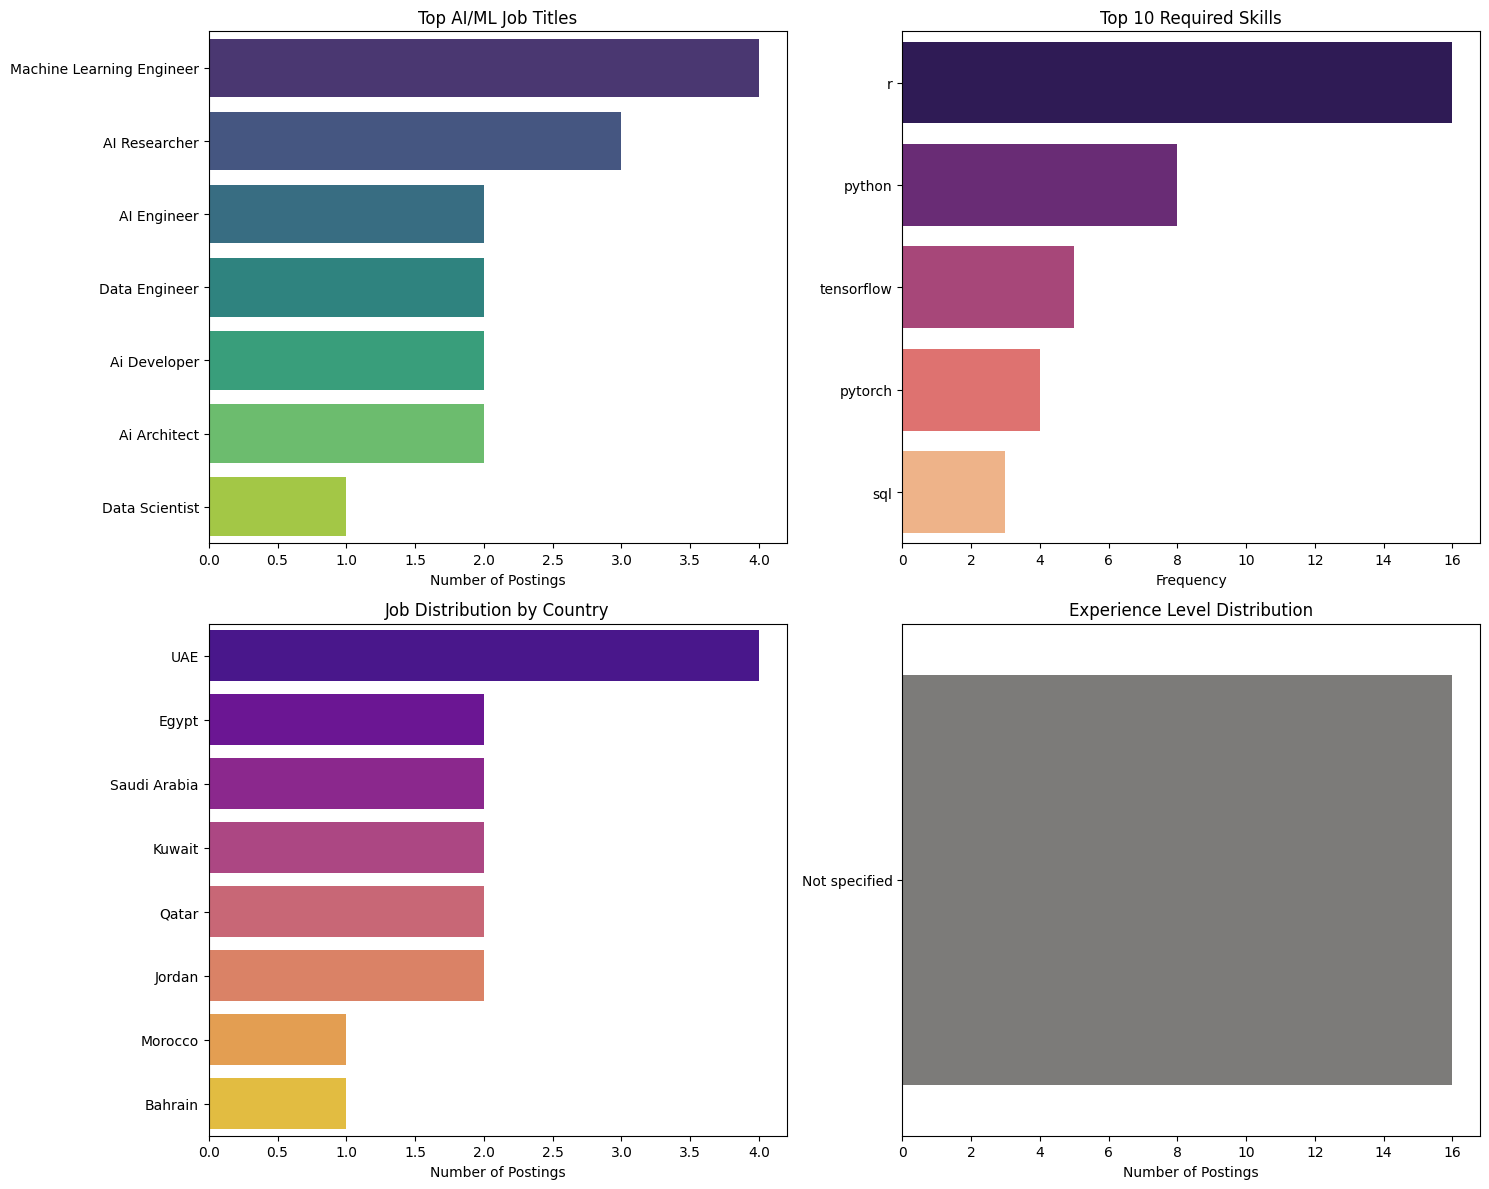


# AI/ML Jobs in MENA - Market Intelligence Report
**Report Date**: May 16, 2025

## Executive Summary
This report analyzes the current state of AI/ML job market in the MENA region based on data collected from multiple job platforms. Key findings include:

- Most in-demand job roles: Machine Learning Engineer, AI Researcher, AI Engineer
- Most sought-after skills: r, python, tensorflow
- Country with most opportunities: UAE

## Detailed Analysis

### 1. Top AI/ML Job Roles
The following are the most in-demand AI/ML job roles in the MENA region:

| Rank | Job Title | Number of Postings |
|------|-----------|--------------------|
| 1 | Machine Learning Engineer | 4 |
| 2 | AI Researcher | 3 |
| 3 | AI Engineer | 2 |
| 4 | Data Engineer | 2 |
| 5 | Ai Developer | 2 |
| 6 | Ai Architect | 2 |
| 7 | Data Scientist | 1 |

![Top Job Titles](job_market_analysis.png)


### 2. Most In-Demand Skills
The most frequently mentioned skills in AI/ML job postings are:

| Rank | Skill | Frequency |
|------|-------|-----------|
| 1 | R | 16 |
| 2 | Python | 8 |
| 3 | Tensorflow | 5 |
| 4 | Pytorch | 4 |
| 5 | Sql | 3 |


### 3. Geographic Distribution
Geographic distribution of AI/ML jobs in MENA:

| Country | Number of Postings |
|---------|--------------------|
| UAE | 4 |
| Egypt | 2 |
| Saudi Arabia | 2 |
| Kuwait | 2 |
| Qatar | 2 |
| Jordan | 2 |
| Morocco | 1 |
| Bahrain | 1 |


### 4. Experience Level Distribution
Distribution of jobs by required experience level:

| Experience Level | Number of Postings |
|------------------|--------------------|
| Not specified | 16 |


### 5. Data Sources
Data was collected from the following platforms:

| Platform | Number of Postings |
|----------|--------------------|
| LinkedIn | 5 |
| Bayt | 4 |
| Glassdoor | 4 |
| Wuzzuf | 3 |


## Conclusion

Based on our analysis of the current AI/ML job market in the MENA region:

1. The most sought-after roles are **Machine Learning Engineer**, **AI Researcher**, and **AI Engineer**.
2. Employers are primarily looking for skills in **r**, **python**, and **tensorflow**.
3. **UAE** appears to be the hub for AI/ML opportunities in the region.

This data suggests that the MENA region is experiencing significant growth in demand for AI/ML talent, particularly in UAE. Professionals looking to enter this market should focus on developing skills in r and python to be competitive for Machine Learning Engineer positions.




Process completed successfully!


In [10]:
def main():
    # Initialize agents
    search_agent = WebSearchAgent()
    extraction_agent = DataExtractionAgent()
    analysis_agent = TrendAnalysisAgent()
    report_agent = ReportWriterAgent()
    
    # Step 1: Search for jobs
    print("Starting job search...")
    search_keywords = "AI OR Machine Learning OR Data Scientist"
    raw_jobs = search_agent.search_jobs(search_keywords)
    
    # Step 2: Process and extract data
    print("\nProcessing job data...")
    jobs_df = extraction_agent.process_jobs(raw_jobs)
    
    # Display sample of processed data
    print("\nSample of processed job data:")
    display(jobs_df.head())
    
    # Step 3: Analyze trends
    print("\nAnalyzing trends...")
    analysis = analysis_agent.analyze_trends(jobs_df)
    
    # Step 4: Generate report
    print("\nGenerating report...")
    report_agent.generate_report(analysis)
    
    # Save the processed data for reference
    jobs_df.to_csv('mena_ai_ml_jobs.csv', index=False)
    with open('job_analysis.json', 'w') as f:
        json.dump(analysis, f, indent=2)
    
    print("\nProcess completed successfully!")

# Execute the main function
if __name__ == "__main__":
    main()